# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.sample()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
103,2015-08-19,3217,12213,9.07,6,421.0,381,13,8,1834,...,5.635835,Wednesday,2.0,1,3.65,92.405063,4.383333,88.552189,August,8


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [4]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
group = pd.DataFrame(fitbit["Steps"].groupby(fitbit["Months_encoded"]).mean())
display(group)
'''Antes de crear el gráfico tenemos que preparar los datos.
Hacemos un dataframe (también podría haber sido una serie de pandas) que recoja la media de steps para cada mes.
También podríamos hacerlo directamente todo en una misma línea de código (sin tener que crear antes el nuevo DataFrame)'''

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


'Antes de crear el gráfico tenemos que preparar los datos.\nHacemos un dataframe (también podría haber sido una serie de pandas) que recoja la media de steps para cada mes.\nTambién podríamos hacerlo directamente todo en una misma línea de código (sin tener que crear antes el nuevo DataFrame)'

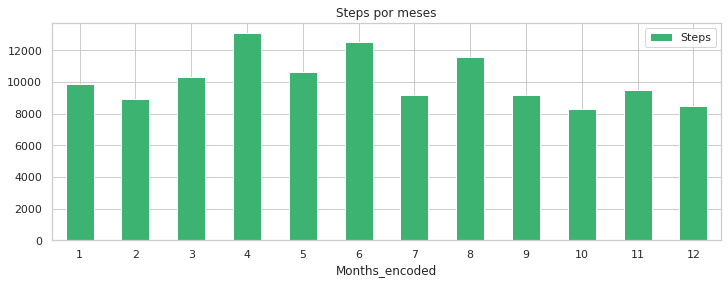

In [6]:
# Ahora generamos el gráfico a partir del DataFrame anterior.

viz1 = group.plot(kind="bar", title="Steps por meses", color = ["mediumseagreen"])
plt.xticks(rotation=360); # para girar las etiquetas


In [7]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
group2 = pd.DataFrame(fitbit["Steps"].groupby(fitbit["Work_or_Weekend"]).mean())
group2

,Steps
Work_or_Weekend,
0,10064.238095
1,10144.572519


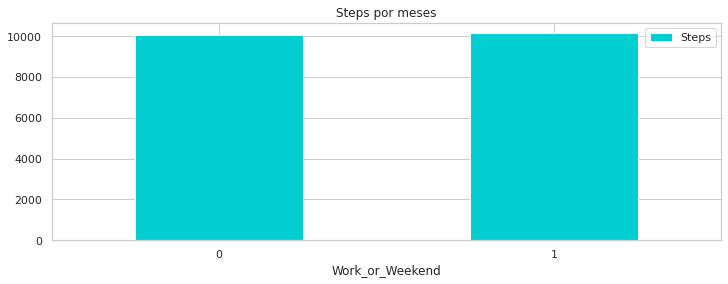

In [8]:
viz2 = group2.plot(kind="bar", title="Steps por meses", color=["darkturquoise"])
plt.xticks(rotation=360); 

In [9]:
viz1.figure.savefig("../graphs/graph1.jpg", dpi=1000)
viz2.figure.savefig("../graphs/graph2.jpg", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

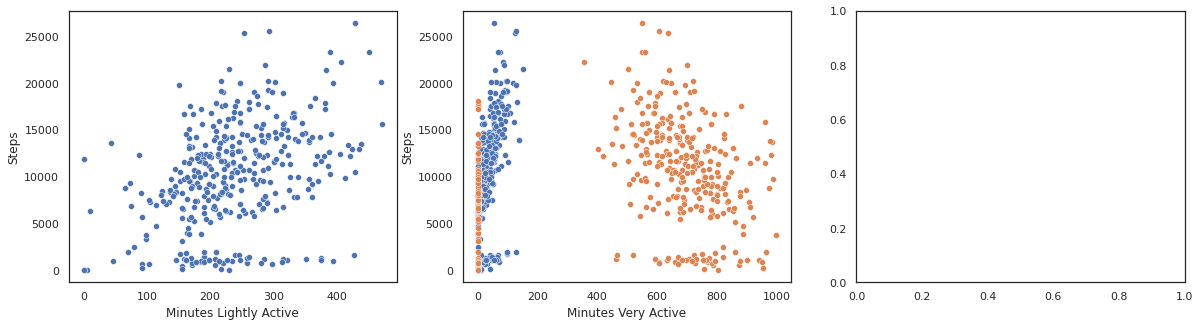

In [248]:
columns_list = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
figura, eje = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
index = 0
for i in columns_list:
    sns.scatterplot(x=i, y="Steps", data=fitbit, ax = eje[index])
    index =+ 1

# No sé por qué, pero el loop solo funciona para los dos pimeros gráficos y no suma +1 al inidex al generar el tercero.
# En el index [0,1] se superponen los gráficos para "Minutes Very Active" y "Minutes Sedentary" y esto hace que el graph sea muy confuso.

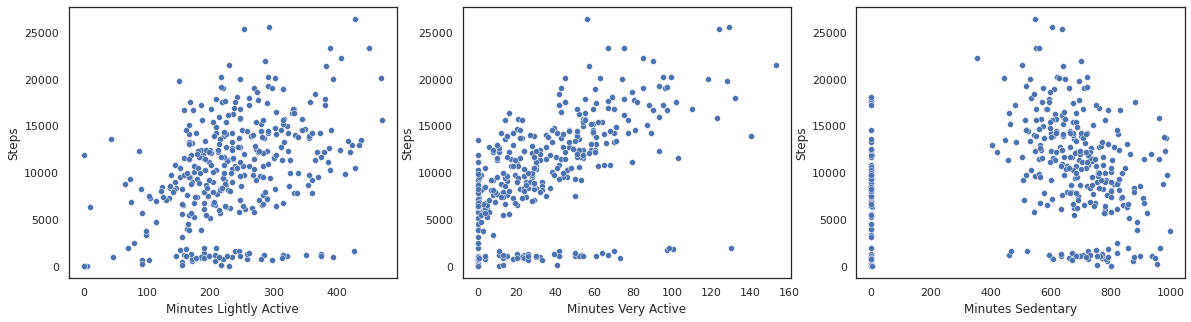

In [247]:
columns_list = ["Minutes Lightly Active", "Minutes Very Active"]
figura, eje = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
index = 0
for i in columns_list:
    sns.scatterplot(x=i, y="Steps", data=fitbit, ax = eje[index])
    index =+ 1
    
sns.scatterplot(x="Minutes Sedentary", y="Steps", data=fitbit, ax = eje[2]);

#El resultado que deberíamos encontrar se muestra a continuación:


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [11]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
# NUMERICAL VARIABLES
titanic._get_numeric_data().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [13]:
titanic.select_dtypes(include=['float64', 'int64']).sample() # Otra forma de extraer las columnas de tipo numérico. El inconveniente es que necesitamos saber antes el tipo de datos que tenemos (dtypes).

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
799,800,0.0,3,30.0,1,1,24.15


In [14]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object').head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [16]:
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

#### Use the right visulalization to show the distribution of column `Age`.

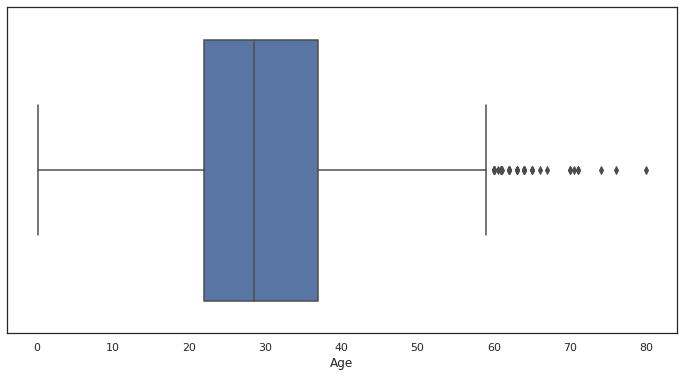

In [40]:
sns.boxplot(x="Age", data=titanic);
# El boxplot nos muestra mayor información sobre la distribución de los datos (mediana, percentiles, valores atípicos...)
# También podríamos utilizar un violin plot, pero quizá sea más complejo para una información similar.

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

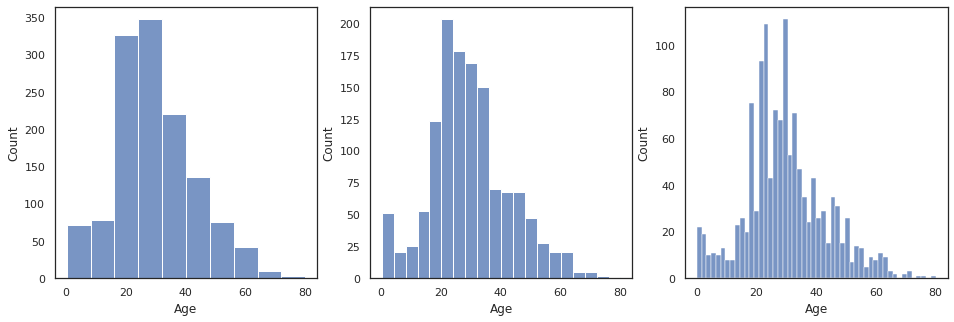

In [35]:
figura, eje = plt.subplots(nrows=1, ncols=3, figsize=(16,5)) # Creamos un subplot de una fila y tres columnas (lugo iremos indicando el graph que queremos en cada posición).
sns.histplot(x=titanic.Age, bins=10, ax = eje[0]) # Como tenemos solo una fila, no hace falta indicar dos coordenadas --> Solo posición en primera (y única) fila.
sns.histplot(x=titanic.Age, bins=20, ax = eje[1])
sns.histplot(x=titanic.Age, bins=50, ax = eje[2]);
# Utilizamos histogramas para poder especificar los bins que queremos (similar al kde, pero mayor detalle en los datos)

#### How does the bin size affect your plot?

In [34]:
"""
A mayor número de bins, tenemos mayor detalle de la información.
Es decir, si indicamos menos bins (menos grupos de edad), el rango de edad en cada bin es más grande.
Esto simplifica el gráfico, pero nos da menor detalle en la información que nos muestra.
"""

'\nA mayor número de bins, tenemos mayor detalle de la información.\nEs decir, si indicamos menos bins (menos grupos de edad), el rango de edad en cada bin es más grande.\nEsto simplifica el gráfico, pero nos da menor detalle en la información que nos muestra.\n'

#### Use seaborn to show the distribution of column `Age`.

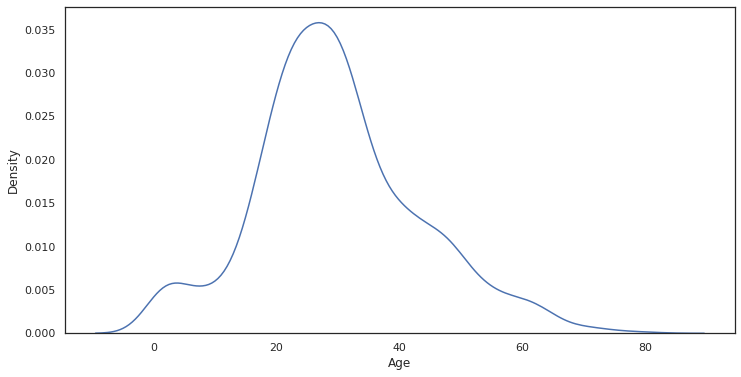

In [36]:
sns.kdeplot(x=titanic.Age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

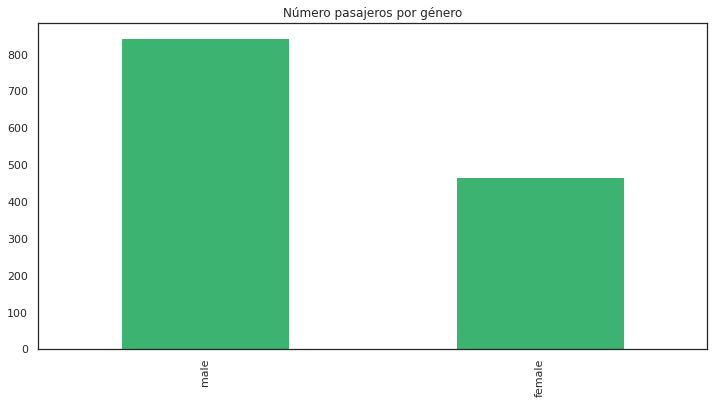

In [75]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", title="Número pasajeros por género", color = ["mediumseagreen"]);
# Tenemos que indicar que nos cuente el número de values para cada género y que a partir de esa salida nos genere un bar plot (necesitamos un valor numérico para hacer el gráfico).
# DUDA: ¿cómo cambiar el color para que cada columna sea diferente? Solo consigo asignar un color a las dos barras, no uno para cada una.

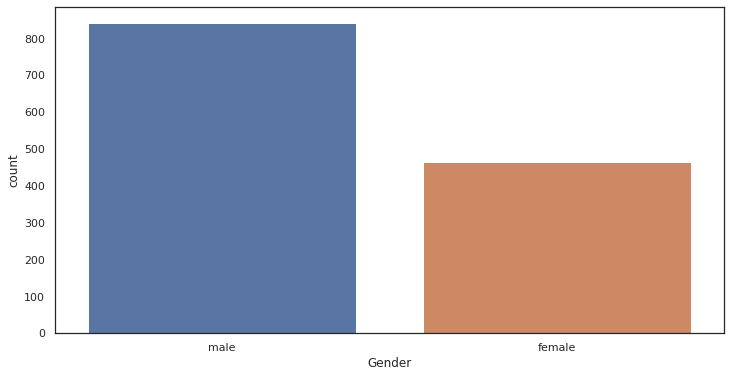

In [46]:
# Method 2 - seaborn
sns.countplot(x="Gender", data=titanic);

#### Use the right plot to visualize the column `Pclass`.

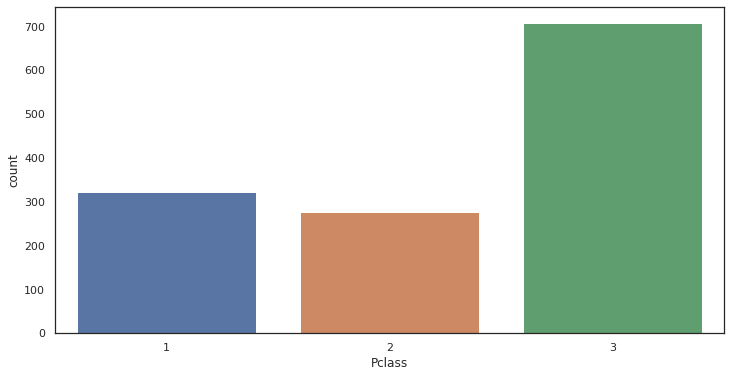

In [80]:
sns.countplot(x="Pclass", data=titanic);

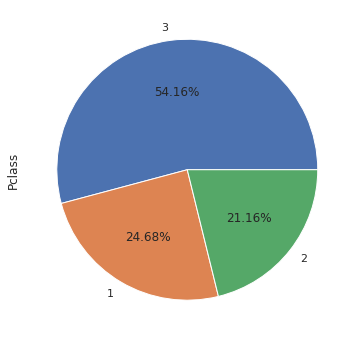

In [152]:
titanic["Pclass"].value_counts().plot.pie(autopct="%.2f%%");
# Podemos usar un pie plot, pero siempre con etiquetas para evitar errores de interpretación.
# Interesante la manera de indicar el tipo de etiqueta (porcentual y con dos decimales en este caso).

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [133]:
pd.DataFrame(titanic["Age"].describe())
# Desde mi punto de vista, lo más cómodo sería acceder a los estadísticos básicos a través del método .describe()

,Age
count,1309.000000
mean,29.879186
std,13.448335
min,0.170000
25%,22.000000
50%,28.500000
75%,37.000000
max,80.000000


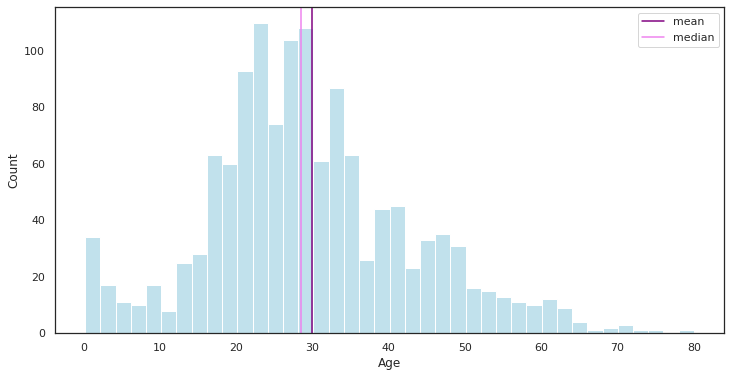

In [142]:
viz3 = sns.histplot(x=titanic.Age, color="lightblue", bins=40)
viz3.axvline(x=titanic.Age.mean(), c="purple", label="mean")
viz3.axvline(x=titanic.Age.median(), c="violet", label="median")
plt.legend();

In [144]:
"""Podemos hacer un histograma por edad, en el que añadamos las estadísticas básicas (media y mediana, por ejemplo).
En el este gráfico podemos ver la distribución de las edades (cantidad de pasajeros por cada rango de edad).
Además, observamos dónde se posiciona la media y la mediana de este conjunto de datos.
Es un gráfico más completo que un histograma básico (aporta dos estadísticas básicas del conjunto de datos, además de la frecuencia para cada rango de edad)."""

'Podemos hacer un histograma por edad, en el que añadamos las estadísticas básicas (media y mediana, por ejemplo).\nEn el este gráfico podemos ver la distribución de las edades (cantidad de pasajeros por cada rango de edad).\nAdemás, observamos dónde se posiciona la media y la mediana de este conjunto de datos.\nEs un gráfico más completo que un histograma básico (aporta dos estadísticas básicas del conjunto de datos, además de la frecuencia para cada rango de edad).'

#### What does the last plot tell you about the feature `Age`?

In [146]:
"""Observamos como el rango de edad con mayor número de pasajeros es estre 22 y 24 años.
Además, la mediana y la moda toman valores bastante similares, por lo que a priori no hay outliers que distorsionen mucho el cálculo de la edad media.
También podemos afirmar que la densidad (cantidad de pasajeros) por debajo de los 28 años es bastante superior a edades por encima de este valor (misma cantidad de pasajeros en el rango 0-28 años que en el grupo de edad 28-80 años).
Esto nos lleva a la conclusión de que los pasajeros del titanic eran, a nivel general, personas jóvenes.
También podríamos afirmar que el rango de edad con mayor densidad de pasajeros es el comprendido entre 18 y 30 años."""

'Observamos como el rango de edad con mayor número de pasajeros es estre 22 y 24 años.\nAdemás, la mediana y la moda toman valores bastante similares, por lo que a priori no hay outliers que distorsionen mucho el cálculo de la edad media.\nTambién podemos afirmar que la densidad (cantidad de pasajeros) por debajo de los 28 años es bastante superior a edades por encima de este valor (misma cantidad de pasajeros en el rango 0-28 años que en el grupo de edad 28-80 años).\nEsto nos lleva a la conclusión de que los pasajeros del titanic eran, a nivel general, personas jóvenes.\nTambién podríamos afirmar que el rango de edad con mayor densidad de pasajeros es el comprendido entre 18 y 30 años.'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

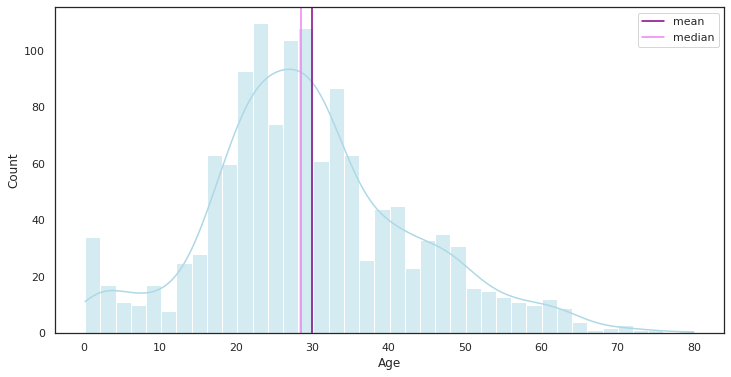

In [149]:
viz3 = sns.histplot(x=titanic.Age, color="lightblue", bins=40, kde=True)
viz3.axvline(x=titanic.Age.mean(), c="purple", label="mean")
viz3.axvline(x=titanic.Age.median(), c="violet", label="median")
plt.legend();

#### What additional information does the last plot provide about feature `Age`?

In [150]:
"""Ya había incluido la distribución de la edad en el gráfico anterior (no encontré un gráfico con sentido que mostrase únicamente un resumen estadístico).
No obstante, podemos completar la información sobre la distribución añadiendo elementos al gráfico anterior.
En este caso añadimos KDE para obtener una línea suavizada de la distribución de los datos (permite observar los datos de manera más visual)."""

'Ya había incluido la distribución de la edad en el gráfico anterior (no encontré un gráfico con sentido que mostrase únicamente un resumen estadístico).\nNo obstante, podemos completar la información sobre la distribución añadiendo elementos al gráfico anterior.\nEn este caso añadimos KDE para obtener una línea suavizada de la distribución de los datos (permite observar los datos de manera más visual).'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

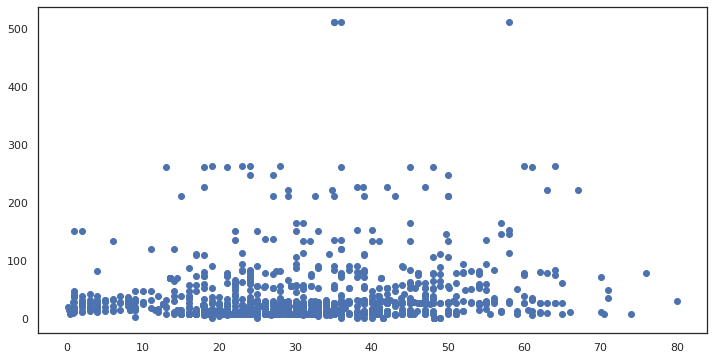

In [163]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare);

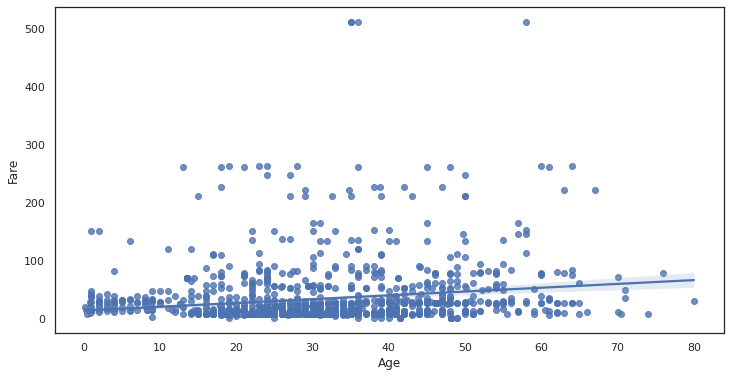

In [161]:
# Method 2 - seaborn
sns.regplot(x="Age", y="Fare", data=titanic);

#### Plot the correlation matrix using seaborn.

In [167]:
corr = titanic.corr()

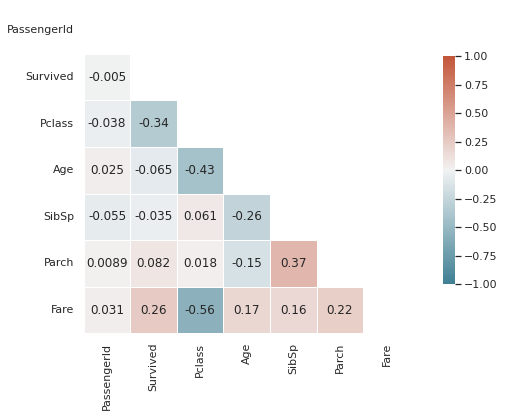

In [168]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7
                     },# barra lateral
            annot=True
);

#### What are the most correlated features?

In [165]:
"""La mayor correlación la encontramos entre "Fare" y "Pclass". Es decir, entre la tarifa y la clase de cada pasajero (algo que es totalmente lógico).
Esta correlación es negativa por la manera de nombrar las clases (1, 2 y 3) --> A mayor tarifa, "menor" clase (aunque esto indique una clase más alta).

También existe bastante correlación entre "Pclass" y "Age", aunque algo menor que la anterior.
La correlación es negativa y ocurre algo parecido a lo anteriormente comentado: a mayor edad, menor clase (recordemos que la clase en realidad es más alta)

Podemos observar cómo la correlación entre "Age" y "Fare" no es tan alta como cabría esperar. Esto es algo que ya observábamos en el gráfico de dispersión del ejercicio anterior."""

'La mayor correlación la encontramos entre "Fare" y "Pclass". Es decir, entre la tarifa y la clase de cada pasajero (algo que es totalmente lógico).\nEsta correlación es negativa por la manera de nombrar las clases (1, 2 y 3) --> A mayor tarifa, "menor" clase (aunque esto indique una clase más alta).\n\nTambién existe bastante correlación entre "Pclass" y "Age", aunque algo menor que la anterior.\nLa correlación es negativa y ocurre algo parecido a lo anteriormente comentado: a mayor edad, menor clase (recordemos que la clase en realidad es más alta)\n\nPodemos observar cómo la correlación entre "Age" y "Fare" no es tan alta como cabría esperar. Esto es algo que ya observábamos en el gráfico de dispersión del ejercicio anterior.'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

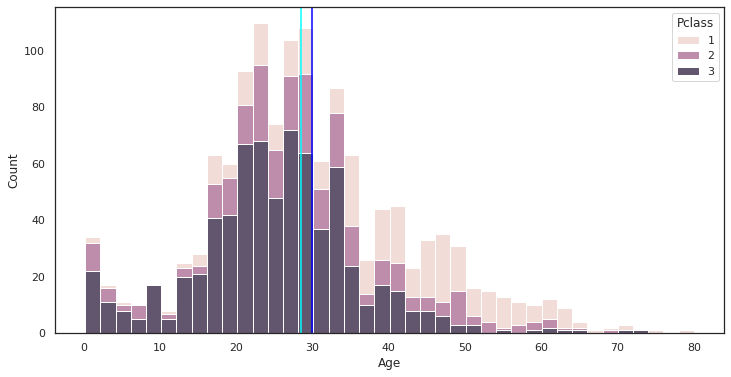

In [195]:
viz4 = sns.histplot(x=titanic.Age, hue=titanic.Pclass, bins=40, multiple="stack")
viz4.axvline(x=titanic.Age.mean(), c="blue", label="mean")
viz4.axvline(x=titanic.Age.median(), c="cyan", label="median");

# Problemas para visualizar en la leyenda tanto las diferentes clases, como el color para la mediana y moda. Puedo mostrar o uno y otro, pero no consigo mostrar ambos.

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

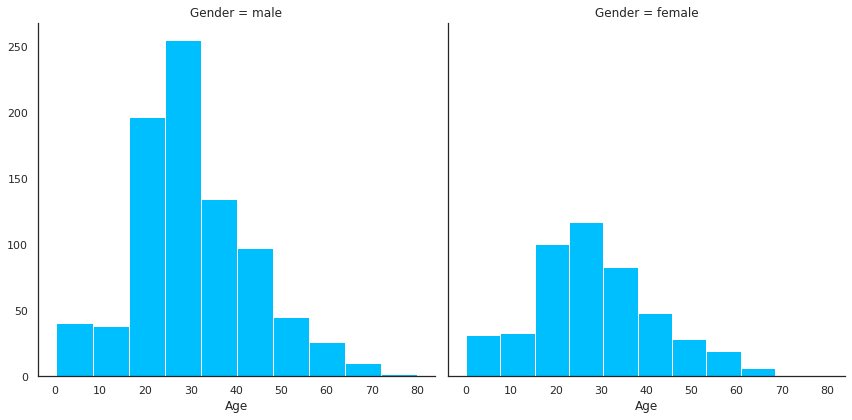

In [212]:
grid = sns.FacetGrid(titanic, col='Gender', height=6)
grid.map(plt.hist, "Age", color="deepskyblue");

# Muy interesante Facetgrid para comparar gráficos en base a una variable discreta (pares de valores en los que los registros son uno u otro).